# Scipy

1. We have the min and max temperatures in a city In India for each months of the year.
    We would like to find a function to describe this and show it graphically, the dataset
    given below.

In [1]:
Max =[39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]
Min =[21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]

In [2]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [3]:
xaxis=np.arange(12)

Text(0, 0.5, 'temperature')

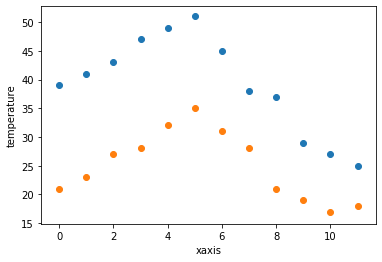

In [4]:
plt.scatter(xaxis,Max,marker="o")
plt.scatter(xaxis,Min,marker="o")
plt.xlabel("xaxis")
plt.ylabel("temperature")

In [5]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg 
            + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, xaxis,
                                      Max,[40,20,0])
res_min, cov_min = optimize.curve_fit(yearly_temps, xaxis,
                                      Min,[-40,20,0])

In [6]:
res_max

array([ 39.10062829, -11.08724928,   2.10332481])

In [7]:
cov_max

array([[0.66228818, 0.01819673, 0.00307791],
       [0.01819673, 1.3255596 , 0.0045694 ],
       [0.00307791, 0.0045694 , 0.04074436]])

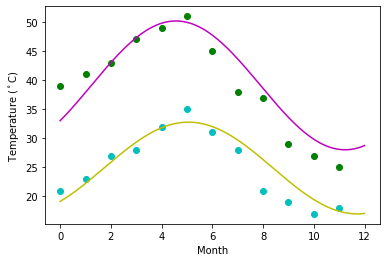

In [8]:

days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(xaxis, Max, 'go')
plt.plot(days, yearly_temps(days, *res_max), 'm-')
plt.plot(xaxis, Min, 'co')
plt.plot(days, yearly_temps(days, *res_min), 'y-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

# Matplotlib

This assignment is for visualization using matplotlib:
data to use:

url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv

titanic = pd.read_csv(url)

Charts to plot:

1. Create a pie chart presenting the male/female proportion

2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

In [9]:
import pandas as pd

In [10]:
df=pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv')

In [11]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [12]:
male=df[df["sex"]=="male"]["sex"].count()

In [13]:
male

843

In [14]:
female=df[df["sex"]=="female"]["sex"].count()

In [15]:
female

466

In [16]:
sizes=[male,female]

In [17]:
labels=["male","female"]

([<matplotlib.patches.Wedge at 0xa1562c8>,
 [Text(-0.9893411941747885, -0.4808367722094511, 'male'),
  Text(0.9893412391939719, 0.4808366795806413, 'female')],
 [Text(-0.5396406513680664, -0.26227460302333694, '64.4%'),
  Text(0.5396406759239846, 0.2622745524985316, '35.6%')])

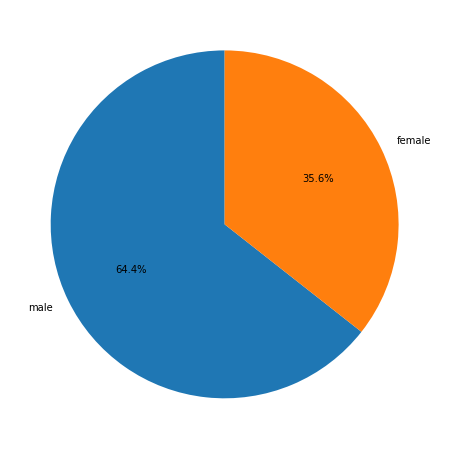

In [18]:
plt.figure(figsize=(8,8))
plt.pie(sizes,labels=labels,autopct='%1.1f%%',startangle=90)

In [19]:
import seaborn as sns

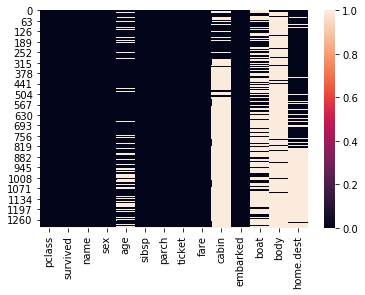

In [20]:
#to check the null values
sns.heatmap(df.isnull())

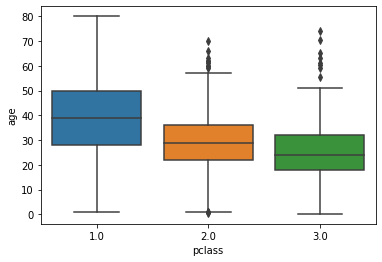

In [21]:
sns.boxplot(y=df["age"],x=df["pclass"])

In [22]:
def fun(data):
    age=data[0]
    pclass=data[1]
    if pd.isnull(age):
        if pclass==1.0:
            return 37
        elif pclass==2.0:
            return 29
        else:
            return 25
    else:
        return int(age)

In [23]:
df["age"]=df[["age","pclass"]].apply(fun,axis=1)

In [24]:
df["age"]

0       29
1        0
2        2
3       30
4       25
        ..
1305    25
1306    26
1307    27
1308    29
1309    25
Name: age, Length: 1310, dtype: int64

In [25]:
f=list(df[df["fare"].isnull()].index.values)

In [26]:
df.drop(df.index[f],inplace=True)

In [27]:
df["sex"]=pd.get_dummies(df["sex"],drop_first=True)

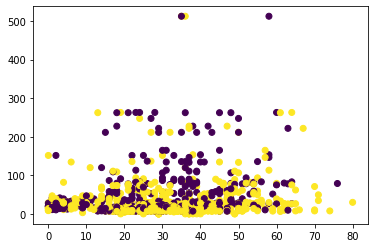

In [28]:
plt.scatter(x=df["age"],y=df["fare"],c=df["sex"])